<a href="https://colab.research.google.com/github/niapollard/TEST/blob/main/Figure%204-Table%201_S1-S3%3A%20Varying%20Classical%20Optimizers%20PLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q numpy==1.23.5 jarvis-tools qiskit==0.43.1 qiskit_nature==0.6.2 pyscf qiskit-aer==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━

Restart the session to succesfully run cells

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [ ]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureDriverType,
    ElectronicStructureMoleculeDriver,
)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.drivers.second_quantization import MethodType

In [ ]:
import time

start_time = time.time()

In [ ]:
molecule = Molecule(
    geometry=[['Al',[0.00000000, 0.00000000, 0.00000000]]],
    charge=-1,
    multiplicity=1)
# multiplicity has to be that active space is even therefore should always be 1 (2s+1)
# charge has to be that active space is even therefore species with an odd number of atoms should have a charge of -1
MethodType = MethodType.RKS

driver = ElectronicStructureMoleculeDriver(
    molecule, basis="sto3g", method=MethodType, driver_type=ElectronicStructureDriverType.PYSCF
)

properties = driver.run()
problem = ElectronicStructureProblem(driver)
qubit_converter = QubitConverter(JordanWignerMapper())

In [ ]:
second_q_ops = problem.second_q_ops()
second_q_ops = list(second_q_ops.values()) #list of second quantized operators
hamiltonian = second_q_ops[0] #Hamiltonian is the first term
print(hamiltonian)

Fermionic Operator
register length=18, number terms=18
  (1+0j) * ( +_0 -_0 )
+ (1+0j) * ( +_1 -_1 )
+ (1+0j) * ( +_2 -_2 )
+ (1+0j) * ( +_3 -_3 )
+ (1+0j) * ( +_4 -_4 )
+ (1+0j) * ( +_5 -_5 )
+ (1+0j) * ( +_6 -_6 )
+ (1+0j) * ( +_7 -_7 )
+ (1+0j) * ( ...


In [ ]:
#lists the full hamiltonian
#hamiltonian.to_list()

In [ ]:
from qiskit.algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()

<ipython-input-11-d9d9d0820b7f>:3: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  numpy_solver = NumPyMinimumEigensolver()


In [ ]:
tmp = properties.get_property('ParticleNumber')
alpha_occ=tmp.occupation_alpha
beta_occ=tmp.occupation_beta

In [ ]:
alpha_occ

array([1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [ ]:
import numpy as np
mo_considered=3
#active and inactive space has to be even, non-magnetic

first_index = min(np.where(alpha_occ<1)[0][0],np.where(beta_occ<1)[0][0])

orb_act = np.arange(first_index-mo_considered,first_index)+1
orb_act

array([5, 6, 7])

In [ ]:
from qiskit_nature.transformers.second_quantization.electronic.active_space_transformer import ActiveSpaceTransformer

#orb_act   = []
transformer= ActiveSpaceTransformer(num_electrons=mo_considered+1, num_molecular_orbitals=len(orb_act), active_orbitals=orb_act)
problem_reduced = ElectronicStructureProblem(driver, [transformer])
second_q_ops_reduced = problem_reduced.second_q_ops()

second_q_ops_reduced = list(second_q_ops_reduced.values())
hamiltonian_reduced = second_q_ops_reduced[0]
print(hamiltonian_reduced)

Fermionic Operator
register length=6, number terms=6
  (1+0j) * ( +_0 -_0 )
+ (1+0j) * ( +_1 -_1 )
+ (1+0j) * ( +_2 -_2 )
+ (1+0j) * ( +_3 -_3 )
+ (1+0j) * ( +_4 -_4 )
+ (1+0j) * ( +_5 -_5 )


In [ ]:
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper

mapper = JordanWignerMapper()
converter = QubitConverter(mapper=mapper)
qubit_op_jw = converter.convert(hamiltonian_reduced)
print(qubit_op_jw) #weighted sum of Pauli terms

3.0 * IIIIII
- 0.5 * IIIIIZ
- 0.5 * IIIIZI
- 0.5 * IIIZII
- 0.5 * IIZIII
- 0.5 * IZIIII
- 0.5 * ZIIIII


In [ ]:
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP, COBYLA, L_BFGS_B, SPSA
import itertools, functools
from qiskit.opflow import I, X, Y, Z
from jarvis.db.figshare import get_wann_electron, get_wann_phonon, get_hk_tb
from jarvis.core.circuits import QuantumCircuitLibrary
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver

<ipython-input-17-890149a85712>:8: NatureDeprecationWarning: The qiskit_nature.algorithms.excited_state_solvers package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.excited_state_solvers package.
  from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
<ipython-input-17-890149a85712>:8: NatureDeprecationWarning: The qiskit_nature.algorithms.pes_sampler package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release . Please refer to 'https://github.com/Qiskit/qiskit-nature/issues/750' for additional information regarding 'extrapolators'.
  from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver


<ipython-input-18-9dde21c5ae03>:26: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
<ipython-input-18-9dde21c5ae03>:29: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)
<ipython-input-18-9dde21c5ae03>:38: NatureDeprecationWarning: The qiskit_nature.algorithms.ground_state_solvers.GroundStateEigensolver class is dep

Result with SLSQP: === GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -238.842309565499
  - computed part:      -1.677391037823
  - ActiveSpaceTransformer extracted energy part: -237.164918527676
~ Nuclear repulsion energy (Hartree): 0.0
> Total ground state energy (Hartree): -238.842309565499
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.977 S: 0.491 S^2: 0.733 M: 0.488
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [-0.00019095  0.00049896  -0.00039409]
    - computed part:      [-0.00019095  0.00049896  -0.00039409]
    - ActiveSpaceTransformer extracted energy part: [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.00019095  -0.00049896  0.00039409]  Total: 0.00066388
                 (debye): [0.00048535  -0.00126822  0.00100169]  Total: 0.00168741
 


<ipython-input-18-9dde21c5ae03>:26: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
<ipython-input-18-9dde21c5ae03>:29: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


Result with COBYLA: === GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -238.843693435314
  - computed part:      -1.678774906503
  - ActiveSpaceTransformer extracted energy part: -237.164918528811
~ Nuclear repulsion energy (Hartree): 0.0
> Total ground state energy (Hartree): -238.843693435314
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.023 S: 0.017 S^2: 0.017 M: -0.011
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.00033899  0.00050222  -0.00064898]
    - computed part:      [0.00033899  0.00050222  -0.00064898]
    - ActiveSpaceTransformer extracted energy part: [0.0  0.0  0.0]
  > Dipole moment (a.u.): [-0.00033899  -0.00050222  0.00064898]  Total: 0.00088787
                 (debye): [-0.00086164  -0.00127652  0.00164953]  Total: 0.00225674
 


<ipython-input-18-9dde21c5ae03>:26: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
<ipython-input-18-9dde21c5ae03>:29: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


Result with L_BFGS_B: === GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -238.842285217754
  - computed part:      -1.677366690238
  - ActiveSpaceTransformer extracted energy part: -237.164918527516
~ Nuclear repulsion energy (Hartree): 0.0
> Total ground state energy (Hartree): -238.842285217754
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: 0.500
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [-0.0000001  0.00000025  -0.00000022]
    - computed part:      [-0.0000001  0.00000025  -0.00000022]
    - ActiveSpaceTransformer extracted energy part: [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0000001  -0.00000025  0.00000022]  Total: 0.00000035
                 (debye): [0.00000025  -0.00000064  0.00000057]  Total: 0.00000089
 


<ipython-input-18-9dde21c5ae03>:26: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
<ipython-input-18-9dde21c5ae03>:29: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)


Result with SPSA: === GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -238.843471519545
  - computed part:      -1.678552991893
  - ActiveSpaceTransformer extracted energy part: -237.164918527652
~ Nuclear repulsion energy (Hartree): 0.0
> Total ground state energy (Hartree): -238.843471519545
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.183 S: 0.122 S^2: 0.137 M: -0.091
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [-0.00018186  0.00079349  0.00048614]
    - computed part:      [-0.00018186  0.00079349  0.00048614]
    - ActiveSpaceTransformer extracted energy part: [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.00018186  -0.00079349  -0.00048614]  Total: 0.00094817
                 (debye): [0.00046224  -0.00201685  -0.00123565]  Total: 0.00241001
 


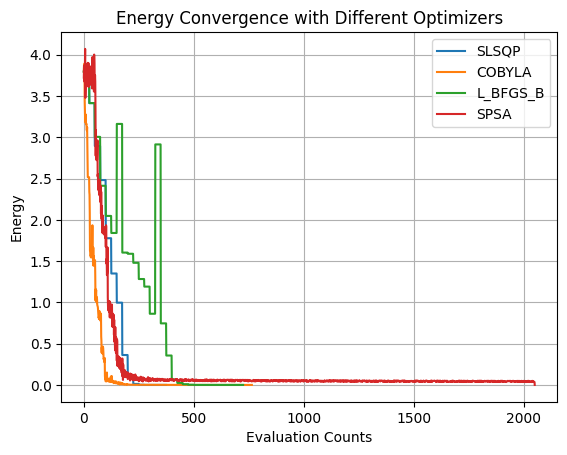

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

seed = 42
counts = []
values = []
plt.clf()

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

optimizers = {
    'SLSQP': SLSQP(maxiter=1000),
    'COBYLA': COBYLA(maxiter=1000),
    'L_BFGS_B': L_BFGS_B(maxfun=1000),
    'SPSA': SPSA(maxiter=1000)
}

results = {}

for opt_name, optimizer in optimizers.items():
  algorithm_globals.random_seed = seed
  counts = []
  values = []
  qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
  n_qubits = qubit_op_jw.num_qubits
  ansatz = QuantumCircuitLibrary(n_qubits=n_qubits, reps=1).circuit6()
  vqe = VQE(ansatz, optimizer=optimizer, quantum_instance=qi,callback=store_intermediate_result)

  result = vqe.compute_minimum_eigenvalue(operator=qubit_op_jw)
  results[opt_name] = {'values':values, 'counts': counts}
  plt.plot(counts,values,label=opt_name,)
  eigenvalue = result.eigenvalue
  #print(result)
  #print(f'Eigenvalue with {opt_name}: {eigenvalue}')

  solver =GroundStateEigensolver(converter, vqe)
  result=solver.solve(problem_reduced)
  print(f'Result with {opt_name}: {result}')
plt.xlabel('Evaluation Counts')
plt.ylabel('Energy')
plt.title('Energy Convergence with Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Record the end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the duration
print("Job took {:.2f} seconds to run.".format(duration))

Job took 66.51 seconds to run.
